In [36]:
import pandas as pd

df = pd.read_excel('BGD.xlsx',sheet_name='Subnational 1 tree cover loss')

print(df.head())

      country subnational1  threshold  area_ha  extent_2000_ha  \
0  Bangladesh      Barisal          0   982748          982748   
1  Bangladesh      Barisal         10   982748          150961   
2  Bangladesh      Barisal         15   982748          132030   
3  Bangladesh      Barisal         20   982748          127320   
4  Bangladesh      Barisal         25   982748          116681   

   extent_2010_ha  gain_2000-2020_ha  tc_loss_ha_2001  tc_loss_ha_2002  \
0          982748              28069                0                0   
1          279072              28069                0                0   
2          240079              28069                0                0   
3          236513              28069                0                0   
4          227365              28069                0                0   

   tc_loss_ha_2003  ...  tc_loss_ha_2014  tc_loss_ha_2015  tc_loss_ha_2016  \
0                2  ...                1                0                2   
1 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            56 non-null     object
 1   subnational1       56 non-null     object
 2   threshold          56 non-null     int64 
 3   area_ha            56 non-null     int64 
 4   extent_2000_ha     56 non-null     int64 
 5   extent_2010_ha     56 non-null     int64 
 6   gain_2000-2020_ha  56 non-null     int64 
 7   tc_loss_ha_2001    56 non-null     int64 
 8   tc_loss_ha_2002    56 non-null     int64 
 9   tc_loss_ha_2003    56 non-null     int64 
 10  tc_loss_ha_2004    56 non-null     int64 
 11  tc_loss_ha_2005    56 non-null     int64 
 12  tc_loss_ha_2006    56 non-null     int64 
 13  tc_loss_ha_2007    56 non-null     int64 
 14  tc_loss_ha_2008    56 non-null     int64 
 15  tc_loss_ha_2009    56 non-null     int64 
 16  tc_loss_ha_2010    56 non-null     int64 
 17 

In [38]:
def clean_data(df):
    # Drop duplicate rows across all columns
    df = df.drop_duplicates()
    # Filter rows based on column: 'threshold'
    df = df[df['threshold'] == 30]
    # Rename column 'subnational1' to 'District'
    df = df.rename(columns={'subnational1': 'District'})
    # Drop column: 'threshold'
    df = df.drop(columns=['threshold'])
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,country,District,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,...,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023
5,Bangladesh,Barisal,982748,102313,193399,28069,0,0,1,2,...,0,0,1,5,0,1,1,1,2,57
13,Bangladesh,Chittagong,3103429,1267576,1330318,106620,3814,3185,1963,2825,...,11718,12418,20665,27639,18806,21663,20957,17008,13187,17137
21,Bangladesh,Dhaka,3097287,91690,214162,66117,276,402,59,322,...,183,85,281,370,240,132,190,207,185,229
29,Bangladesh,Khulna,2077872,331746,334492,27503,8,8,2,15,...,0,0,0,0,7,1,5,9,4,11
37,Bangladesh,Rajshahi,1821149,7467,1826,34015,43,32,8,31,...,0,0,0,1,2,2,0,0,2,5


In [41]:
# Calculate the total tree cover loss from 2000 to 2020
loss_columns_2000_2020 = [f'tc_loss_ha_{year}' for year in range(2001, 2021)]
df_clean['total_tc_loss_2000_2020'] = df_clean[loss_columns_2000_2020].sum(axis=1)

# Display the first few rows to verify
df_clean[['District', 'total_tc_loss_2000_2020']].head()


,District,total_tc_loss_2000_2020
5,Barisal,37
13,Chittagong,183351
21,Dhaka,5035
29,Khulna,179
37,Rajshahi,317


In [42]:
# Renaming columns 
df_clean = df_clean.rename(columns={'total_tc_loss_2000_2020': 'Loss'})
df_clean = df_clean.rename(columns={'gain_2000-2020_ha': 'Gain'})

df_clean.head()

,country,District,area_ha,extent_2000_ha,extent_2010_ha,Gain,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,...,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023,Loss
5,Bangladesh,Barisal,982748,102313,193399,28069,0,0,1,2,...,0,1,5,0,1,1,1,2,57,37
13,Bangladesh,Chittagong,3103429,1267576,1330318,106620,3814,3185,1963,2825,...,12418,20665,27639,18806,21663,20957,17008,13187,17137,183351
21,Bangladesh,Dhaka,3097287,91690,214162,66117,276,402,59,322,...,85,281,370,240,132,190,207,185,229,5035
29,Bangladesh,Khulna,2077872,331746,334492,27503,8,8,2,15,...,0,0,0,7,1,5,9,4,11,179
37,Bangladesh,Rajshahi,1821149,7467,1826,34015,43,32,8,31,...,0,0,1,2,2,0,0,2,5,317


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting Seaborn theme
sns.set_style("darkgrid")

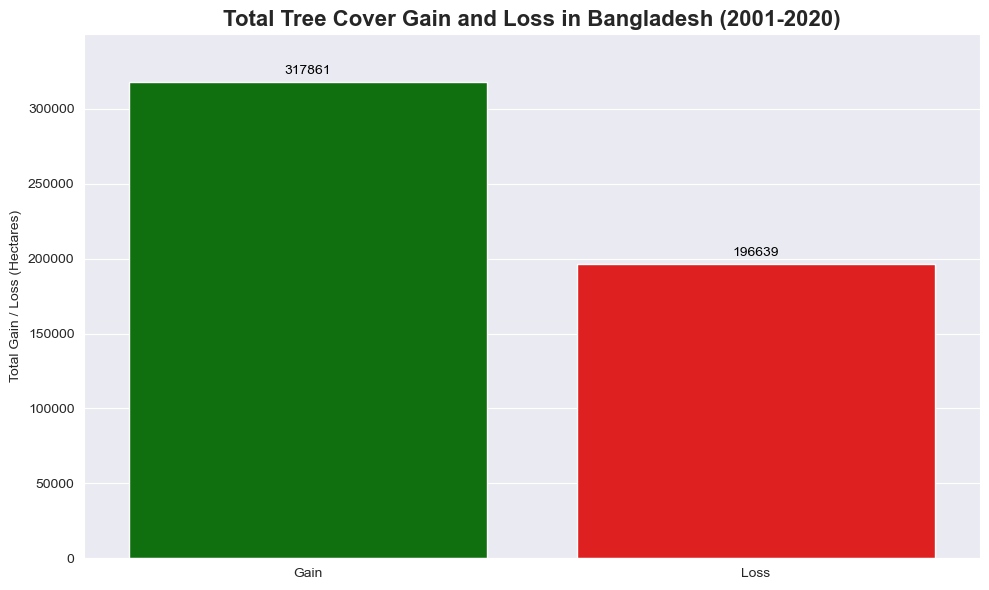

In [60]:
# Sum up the Gain and Loss for the entire country
total_gain = df_clean['Gain'].sum()
total_loss = df_clean['Loss'].sum()

# Create a new DataFrame for plotting
summary_df = pd.DataFrame({
    'Type': ['Gain', 'Loss'],
    'Total_Ha': [total_gain, total_loss]
})

# Set Seaborn style
sns.set_style("darkgrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Type', y='Total_Ha', data=summary_df, palette={'Gain': 'green', 'Loss': 'red'})
plt.title('Total Tree Cover Gain and Loss in Bangladesh (2001-2020)', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Total Gain / Loss (Hectares)')
plt.ylim(0, max(summary_df['Total_Ha']) * 1.1)  # Set y-axis limit with some padding for better visualization

# Annotate each bar with the height value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points',
                fontsize=10,  # Adjust font size 
                color='black')  # Adjust text color 

plt.tight_layout()

# Show the plot
plt.show()

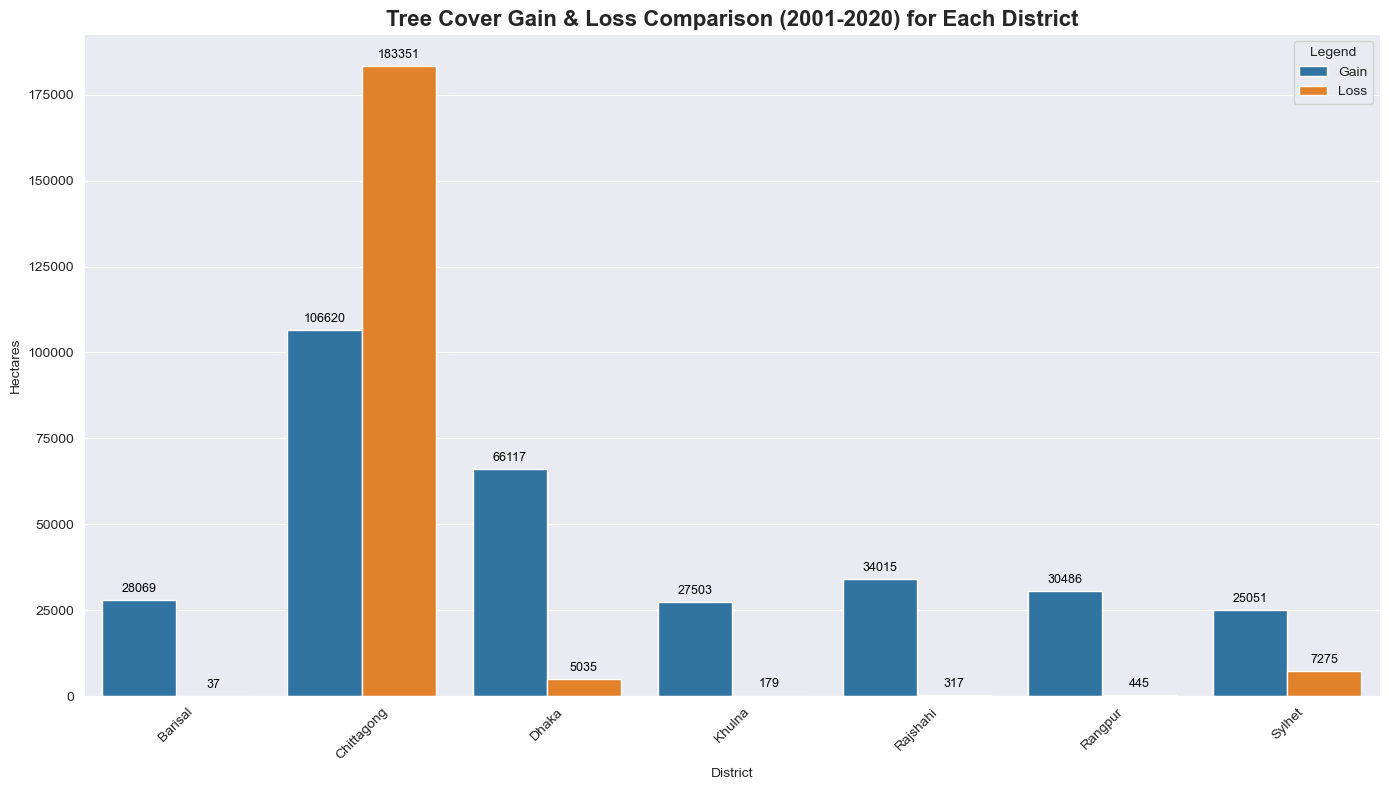

In [45]:
# Create a new DataFrame for plotting
plot_df = df_clean[['District', 'Gain', 'Loss']]

# Melt the DataFrame for seaborn
melted_plot_df = plot_df.melt(id_vars='District', var_name='type', value_name='hectares')

# Sort the melted DataFrame by 'District' in alphabetical order
melted_plot_df = melted_plot_df.sort_values(by='District')

# Create the bar plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='District', y='hectares', hue='type', data=melted_plot_df)
plt.title('Tree Cover Gain & Loss Comparison (2001-2020) for Each District', fontsize=16, fontweight='bold')
plt.xlabel('District')
plt.ylabel('Hectares')
plt.xticks(rotation=45)
plt.legend(title='Legend')

# Annotate each bar with the height value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points',
                fontsize=9,  # Adjust the font size 
                color='black')  # Adjust the color 

plt.tight_layout()

# Show the plot
plt.show()